In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use("ggplot")
import warnings as w
w.filterwarnings("ignore")

In [60]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Data Science\Data Sets\Thyroid_Diff.csv")

In [61]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()

In [68]:
def label_encode(df): 
    le = LabelEncoder() 
    for col in df.select_dtypes(include=['object']).columns: 
        df[col] = le.fit_transform(df[col]) 
    return df 

label_encode(df)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


In [81]:
corr = df.corr()
corr["Recurred"].sort_values(ascending = False)

Recurred                1.000000
Response                0.708957
N                       0.632323
T                       0.556201
Stage                   0.449137
M                       0.354360
Smoking                 0.333243
Gender                  0.328189
Age                     0.258897
Hx Radiothreapy         0.174407
Hx Smoking              0.136073
Thyroid Function        0.067758
Pathology               0.003272
Physical Examination   -0.131801
Adenopathy             -0.182530
Focality               -0.383776
Risk                   -0.733376
Name: Recurred, dtype: float64

<Axes: >

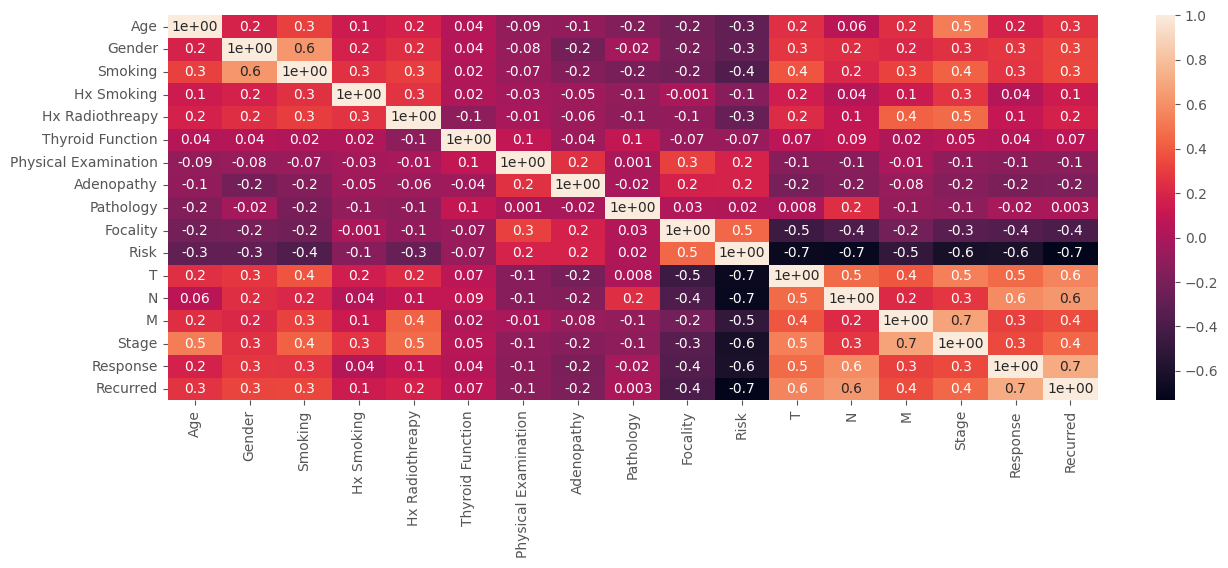

In [78]:
plt.figure( figsize = (15,5))
sns.heatmap(corr, annot = True, fmt = ".1")